In [1]:
%matplotlib inline

In [2]:
import os
import pickle
import pandas as pd

In [3]:
DATA_DIR = '/Users/adam/audio/data/'
SOUND_DIR = '/Users/adam/audio/sound/'

In [4]:
def combine_pickle(DATA_DIR):
    """ Combines directory of pickled episode objects into a single DataFrame """
    
    collect = []
    for epi in os.listdir(DATA_DIR):
        pkl = '.pickle'
        if epi[-len(pkl):] != pkl:
            pass
        else:
            partial = pickle.load(open(DATA_DIR + epi, 'rb'))
#             if partial is not None:
#                 print 'Found %d segments in %s' % (partial.shape[0], epi)
            collect.append(partial)
    episode = pd.concat(collect, axis=0)

    return episode

In [5]:
tal = combine_pickle(DATA_DIR)

In [6]:
tal.shape

(148857, 7)

In [7]:
# already_gotten = os.listdir(SOUND_DIR)
# print already_gotten

In [8]:
tal.text[1000:1010]

89                 Then it's time to go to the wedding.
90    The week passes and we take a train overnight ...
91                                              Modena.
92    To Modena. Excuse me. But we get to Modena, an...
93    Because I knew that as soon as we got back to ...
94    So her friend lives like-- we thought she live...
95                                           Formigene.
96    Formigene. And she drops us there with her non...
97    And then she cancels the wedding. And she deci...
98                                  It wasn't that bad.
Name: text, dtype: object

In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
segments = tal.text.tolist()
tfidf = TfidfVectorizer(segments, min_df=3, stop_words='english')
X = tfidf.fit_transform(segments)

In [26]:
X.shape

(148857, 31118)

In [27]:
vocab = tfidf.get_feature_names()
# print vocab[-1000:]

In [28]:
print type(X)
print "Vocabulary size", len(vocab)

<class 'scipy.sparse.csr.csr_matrix'>
Vocabulary size 31118


In [29]:
vocab_sum = X.sum(axis = 0)
vocab_counts = pd.Series(vocab_sum.tolist()[0])

import numpy as np
log_vocab_counts = np.log(vocab_counts)



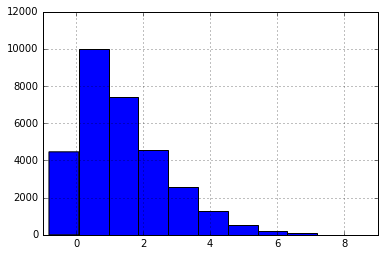

In [30]:
log_vocab_counts.hist()

In [31]:
from sklearn.decomposition import NMF

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    

In [38]:
n_samples = 2000
n_features = 1000
n_topics = 15
n_top_words = 25

In [39]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features,"
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5)
T = nmf.fit(X)

print("\nTopics in NMF model:")
vocab = tfidf.get_feature_names()
print_top_words(T, vocab, n_top_words)

Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...

Topics in NMF model:
Topic #0:
yeah sure mean exactly course definitely absolutely guess laughs got probably lot ll sort let remember good true hear totally funny bit great basically kind
Topic #1:
just let little thought didn kind wanted saying mean couldn sort ll wasn sitting maybe remember want away thing thinking trying talking stop started stuff
Topic #2:
radio public american international life ira glass stories week pri program distributed chicago wbez today theme continues minute act coming torey malatia oversight management choose
Topic #3:
speaking arabic spanish tigrinya foreign language japanese hebrew chinese french greek polish dari pashto korean portuguese krio german vietnamese khmer english farsi singing yiddish inuit
Topic #4:
yes sir said course exactly definitely absolutely sure says laughs probably answer ma help actually available fact helfinger uh tell hello true told does hi
Topic 

In [42]:
fiteed = nmf.fit_transform(X)

In [43]:
fiteed.shape

(148857, 15)

In [54]:
extreme = fiteed.max(axis=0)

In [60]:
extreme

array([ 0.07621328,  0.07444339,  0.07780048,  0.08887178,  0.09771294,
        0.08228211,  0.11879459,  0.06959442,  0.06927793,  0.08530194,
        0.09122244,  0.03311535,  0.0893223 ,  0.09312152,  0.08306193])

In [82]:
topic = 11
tal[(fiteed[0:,topic] == extreme[topic])]

,episode_number,title,act_type,speaker_name,speaker_class,begin,text
45,553,Stuck In The Middle (2015),prologue,Rachel,subject,00:06:09.96,But what are you really going to do?
